In [14]:
import numpy as np 
import pandas as pd
import os
import librosa
import wave
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import RMSprop

In [2]:
def extract_mfcc(wav_file_name):
    # This function extracts mfcc features and obtain the mean of each dimension
    # input file_path
    # output mfcc features
    
    y,sr = librosa.load(wav_file_name)
    mfccs = np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    
    return mfccs

In [3]:
# load radvess speech data
ravdess_speech_labels = [] # to save extracted label/file
ravdess_speech_data = [] # to save extracted feature/file
for dirname,_,filenames in os.walk('D:\Machine Learning Internship at NullClass\sound_emotion\speech-emotion-recognition-ravdess-data'):
    for filename in filenames:
        ravdess_speech_labels.append(int(filename[7:8])-1) # index 7 and 8 represent emotion label
        wav_file_name = os.path.join(dirname,filename)
        ravdess_speech_data.append(extract_mfcc(wav_file_name))
        
print("Finish loading the dataset")

Finish loading the dataset


In [4]:
ravdess_speech_data

[array([-7.0482343e+02,  6.5328873e+01, -9.1941586e+00,  2.1375933e+01,
        -2.1899927e-01,  6.9793468e+00, -8.2752504e+00,  2.1810386e-01,
        -1.3070978e+01, -2.2169061e+00,  1.0332372e+00, -4.2324495e+00,
         3.5414190e+00, -5.8684549e+00,  2.5752656e+00, -1.3276272e+00,
        -2.3619294e+00, -3.5563121e+00, -3.6111951e-01, -1.7603140e+00,
        -5.6790471e+00, -6.7129582e-01, -2.4971476e+00, -4.3374004e+00,
        -1.8938820e+00, -7.5363076e-01, -4.7375827e+00, -1.8242733e-01,
        -1.6039002e+00, -6.7051047e-01, -1.0353020e+00, -3.2262919e+00,
        -1.5269090e+00, -3.0918429e+00, -1.9545412e+00, -2.7099204e+00,
         9.8546036e-03, -2.7455802e+00, -2.6724453e+00, -2.1335239e+00],
       dtype=float32),
 array([-7.0093744e+02,  6.6999016e+01, -1.2747991e+01,  2.6037918e+01,
        -1.4869267e-01,  6.9992352e+00, -7.0496044e+00, -1.6537246e+00,
        -1.3773560e+01, -8.7100297e-01,  1.3544906e+00, -4.4532223e+00,
         3.1503975e+00, -6.0806613e+00, 

In [5]:
# convert data and label to array 
ravdess_speech_data_array = np.asarray(ravdess_speech_data) # convert the input to array
ravdess_speech_label_array =  np.array(ravdess_speech_labels)
ravdess_speech_label_array.shape # get tuple of Array dimension

# Make categorical label
labels_categorical = to_categorical(ravdess_speech_label_array) # convert a class vector to binary class Matrix
labels_categorical.shape

(1440, 8)

In [6]:
ravdess_speech_data_array.shape

(1440, 40)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(np.array(ravdess_speech_data_array),labels_categorical,test_size=0.20,random_state=9)

In [8]:
# Split the training, Validating and testing sets
number_of_samples = ravdess_speech_data_array.shape[0]
training_samples = int(number_of_samples * 0.8)
validation_samples = int(number_of_samples * 0.1)
test_samples = int(number_of_samples * 0.1)

In [9]:
# define the model
def create_model():
    model = Sequential()
    model.add(LSTM(128,return_sequences=False, input_shape=(40,1)))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(8))
    model.add(Activation('softmax'))
    
    # configure the Model trianing
    
    model.compile(loss='categorical_crossentropy',optimizer='Adam', metrics=['accuracy'])
    return model

In [10]:
w = np.expand_dims(ravdess_speech_data_array[:training_samples],-1)

In [11]:
w.shape

(1152, 40, 1)

In [13]:
# Training using LSTM
model_A = create_model()
history = model_A.fit(np.expand_dims(ravdess_speech_data_array[:training_samples],-1),labels_categorical[:training_samples],validation_data=(np.expand_dims(ravdess_speech_data_array[training_samples:training_samples+validation_samples],-1),labels_categorical[training_samples:training_samples+validation_samples]),epochs=300,shuffle=True)

Epoch 1/300
36/36 [==============================] - 2s 24ms/step - loss: 2.0727 - accuracy: 0.1502 - val_loss: 2.0620 - val_accuracy: 0.1806
Epoch 2/300
36/36 [==============================] - 0s 13ms/step - loss: 2.0593 - accuracy: 0.1493 - val_loss: 2.0693 - val_accuracy: 0.1528
Epoch 3/300
36/36 [==============================] - 0s 13ms/step - loss: 2.0337 - accuracy: 0.2057 - val_loss: 2.0336 - val_accuracy: 0.1736
Epoch 4/300
36/36 [==============================] - 0s 12ms/step - loss: 1.9841 - accuracy: 0.2188 - val_loss: 2.0159 - val_accuracy: 0.2014
Epoch 5/300
36/36 [==============================] - 0s 12ms/step - loss: 1.9729 - accuracy: 0.2248 - val_loss: 2.0030 - val_accuracy: 0.1944
Epoch 6/300
36/36 [==============================] - 0s 13ms/step - loss: 1.9366 - accuracy: 0.2413 - val_loss: 1.9717 - val_accuracy: 0.2014
Epoch 7/300
36/36 [==============================] - 0s 13ms/step - loss: 1.9195 - accuracy: 0.2552 - val_loss: 1.9847 - val_accuracy: 0.1875
Epoch 

36/36 [==============================] - 0s 12ms/step - loss: 1.3556 - accuracy: 0.4714 - val_loss: 2.6861 - val_accuracy: 0.1458
Epoch 59/300
36/36 [==============================] - 0s 12ms/step - loss: 1.3054 - accuracy: 0.4974 - val_loss: 2.4158 - val_accuracy: 0.1806
Epoch 60/300
36/36 [==============================] - 0s 12ms/step - loss: 1.2929 - accuracy: 0.5139 - val_loss: 2.3674 - val_accuracy: 0.2083
Epoch 61/300
36/36 [==============================] - 0s 12ms/step - loss: 1.2405 - accuracy: 0.5278 - val_loss: 2.7790 - val_accuracy: 0.1875
Epoch 62/300
36/36 [==============================] - 0s 12ms/step - loss: 1.2844 - accuracy: 0.5217 - val_loss: 2.7203 - val_accuracy: 0.1875
Epoch 63/300
36/36 [==============================] - 0s 13ms/step - loss: 1.2345 - accuracy: 0.5208 - val_loss: 2.5258 - val_accuracy: 0.2222
Epoch 64/300
36/36 [==============================] - 0s 12ms/step - loss: 1.1810 - accuracy: 0.5599 - val_loss: 2.7621 - val_accuracy: 0.1944
Epoch 65/300

36/36 [==============================] - 0s 12ms/step - loss: 0.4519 - accuracy: 0.8351 - val_loss: 5.5438 - val_accuracy: 0.1875
Epoch 116/300
36/36 [==============================] - 0s 12ms/step - loss: 0.5467 - accuracy: 0.8108 - val_loss: 5.5016 - val_accuracy: 0.1736
Epoch 117/300
36/36 [==============================] - 0s 12ms/step - loss: 0.4579 - accuracy: 0.8481 - val_loss: 5.2154 - val_accuracy: 0.1875
Epoch 118/300
36/36 [==============================] - 0s 12ms/step - loss: 0.4413 - accuracy: 0.8550 - val_loss: 5.6585 - val_accuracy: 0.1389
Epoch 119/300
36/36 [==============================] - 0s 12ms/step - loss: 0.3662 - accuracy: 0.8689 - val_loss: 5.9715 - val_accuracy: 0.1875
Epoch 120/300
36/36 [==============================] - 0s 12ms/step - loss: 0.3854 - accuracy: 0.8767 - val_loss: 5.8234 - val_accuracy: 0.1597
Epoch 121/300
36/36 [==============================] - 0s 12ms/step - loss: 0.3416 - accuracy: 0.8863 - val_loss: 5.9143 - val_accuracy: 0.1806
Epoch 

Epoch 172/300
36/36 [==============================] - 0s 12ms/step - loss: 0.2574 - accuracy: 0.9306 - val_loss: 7.3805 - val_accuracy: 0.1736
Epoch 173/300
36/36 [==============================] - 0s 12ms/step - loss: 0.2127 - accuracy: 0.9366 - val_loss: 7.3879 - val_accuracy: 0.1806
Epoch 174/300
36/36 [==============================] - 0s 12ms/step - loss: 0.1482 - accuracy: 0.9549 - val_loss: 7.4390 - val_accuracy: 0.1806
Epoch 175/300
36/36 [==============================] - 0s 12ms/step - loss: 0.1427 - accuracy: 0.9609 - val_loss: 8.0125 - val_accuracy: 0.1875
Epoch 176/300
36/36 [==============================] - 0s 12ms/step - loss: 0.0958 - accuracy: 0.9740 - val_loss: 8.6119 - val_accuracy: 0.1458
Epoch 177/300
36/36 [==============================] - 0s 12ms/step - loss: 0.1798 - accuracy: 0.9444 - val_loss: 8.5020 - val_accuracy: 0.1736
Epoch 178/300
36/36 [==============================] - 0s 12ms/step - loss: 0.2703 - accuracy: 0.9271 - val_loss: 7.2323 - val_accuracy:

Epoch 229/300
36/36 [==============================] - 0s 12ms/step - loss: 0.1387 - accuracy: 0.9609 - val_loss: 7.2911 - val_accuracy: 0.2083
Epoch 230/300
36/36 [==============================] - 0s 12ms/step - loss: 0.0794 - accuracy: 0.9818 - val_loss: 8.4381 - val_accuracy: 0.1875
Epoch 231/300
36/36 [==============================] - 0s 12ms/step - loss: 0.0636 - accuracy: 0.9852 - val_loss: 8.7158 - val_accuracy: 0.1875
Epoch 232/300
36/36 [==============================] - 0s 12ms/step - loss: 0.1149 - accuracy: 0.9661 - val_loss: 8.5466 - val_accuracy: 0.1944
Epoch 233/300
36/36 [==============================] - 0s 12ms/step - loss: 0.1137 - accuracy: 0.9714 - val_loss: 8.7405 - val_accuracy: 0.2153
Epoch 234/300
36/36 [==============================] - 0s 12ms/step - loss: 0.0898 - accuracy: 0.9800 - val_loss: 9.0185 - val_accuracy: 0.1875
Epoch 235/300
36/36 [==============================] - 0s 13ms/step - loss: 0.0413 - accuracy: 0.9939 - val_loss: 9.3497 - val_accuracy:

Epoch 286/300
36/36 [==============================] - 0s 12ms/step - loss: 0.1078 - accuracy: 0.9792 - val_loss: 8.4862 - val_accuracy: 0.2014
Epoch 287/300
36/36 [==============================] - 0s 12ms/step - loss: 0.1642 - accuracy: 0.9627 - val_loss: 8.2452 - val_accuracy: 0.1944
Epoch 288/300
36/36 [==============================] - 0s 12ms/step - loss: 0.0966 - accuracy: 0.9792 - val_loss: 8.5783 - val_accuracy: 0.1875
Epoch 289/300
36/36 [==============================] - 0s 12ms/step - loss: 0.0960 - accuracy: 0.9748 - val_loss: 8.6522 - val_accuracy: 0.1944
Epoch 290/300
36/36 [==============================] - 0s 12ms/step - loss: 0.0911 - accuracy: 0.9835 - val_loss: 8.7726 - val_accuracy: 0.2014
Epoch 291/300
36/36 [==============================] - 0s 12ms/step - loss: 0.0848 - accuracy: 0.9800 - val_loss: 9.3447 - val_accuracy: 0.2153
Epoch 292/300
36/36 [==============================] - 0s 12ms/step - loss: 0.0783 - accuracy: 0.9818 - val_loss: 9.2499 - val_accuracy:

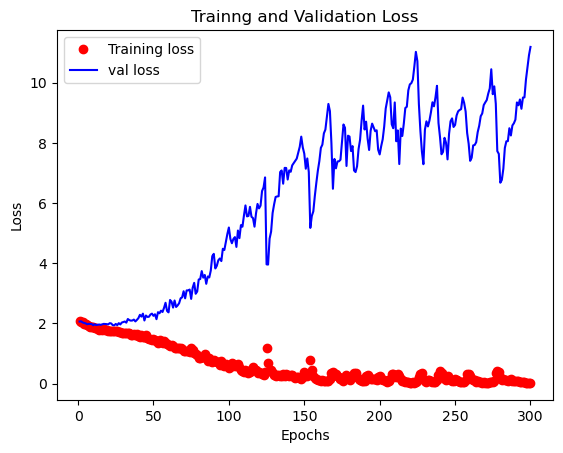

In [16]:
# Loss Plots
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'ro',label='Training loss')
plt.plot(epochs,val_loss,'b',label='val loss')
plt.title('Trainng and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

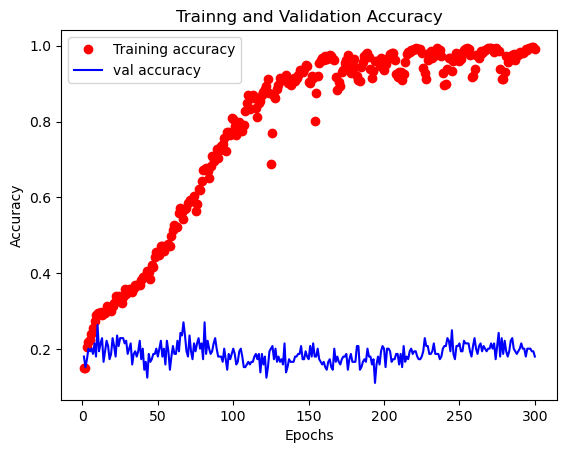

In [17]:
# Loss Plots
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']

plt.plot(epochs,loss,'ro',label='Training accuracy')
plt.plot(epochs,val_loss,'b',label='val accuracy')
plt.title('Trainng and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [19]:
model_A.evaluate(np.expand_dims(ravdess_speech_data_array[training_samples+validation_samples:],-1), labels_categorical[training_samples+validation_samples:])

5/5 [==============================] - 0s 6ms/step - loss: 8.3369 - accuracy: 0.2708


[8.33694839477539, 0.2708333432674408]

In [20]:
emotions={1:'nuetral',2:'calm',3:'happy',4:'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}
def predict(wav_filepath):
    test_point=extract_mfcc(wav_filepath)
    test_point=np.reshape(test_point,newshape=(1,40,1))
    predictions=model_A.predict(test_point)
    print(emotions[np.argmax(predictions[0])+1])

In [22]:
predict(r"D:\Machine Learning Internship at NullClass\sound_emotion\speech-emotion-recognition-ravdess-data\Actor_01\03-01-01-01-02-02-01.wav")

1/1 [==============================] - 0s 354ms/step
nuetral


In [23]:
predict(r"D:\Machine Learning Internship at NullClass\sound_emotion\speech-emotion-recognition-ravdess-data\Actor_01\03-01-04-02-01-01-01.wav")

1/1 [==============================] - 0s 18ms/step
sad


In [25]:
predict(r"D:\Machine Learning Internship at NullClass\sound_emotion\speech-emotion-recognition-ravdess-data\Actor_01\03-01-08-01-01-02-01.wav")

1/1 [==============================] - 0s 21ms/step
surprised


In [24]:
model_A.save('mymodel.h5')
modelc=tf.keras.models.load_model('mymodel.h5')

C:\Users\mohit\anaconda3\New folder\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
